Importing Libraries

In [1]:
# Building neural network
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Loading data

In [83]:
# Loading dataset from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [84]:
#Printing the shape of the train data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [85]:
#Printing the shape of the test data
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [86]:
# Displaying the image in 2D numpy array 28x28 pixel
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [87]:
# Displaying the list of categories 
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Showing Images

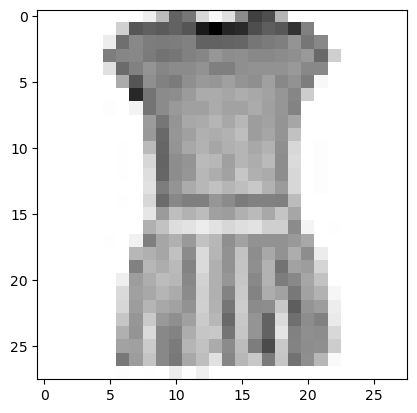

In [88]:
plt.imshow(x_train[3], cmap= 'Greys')

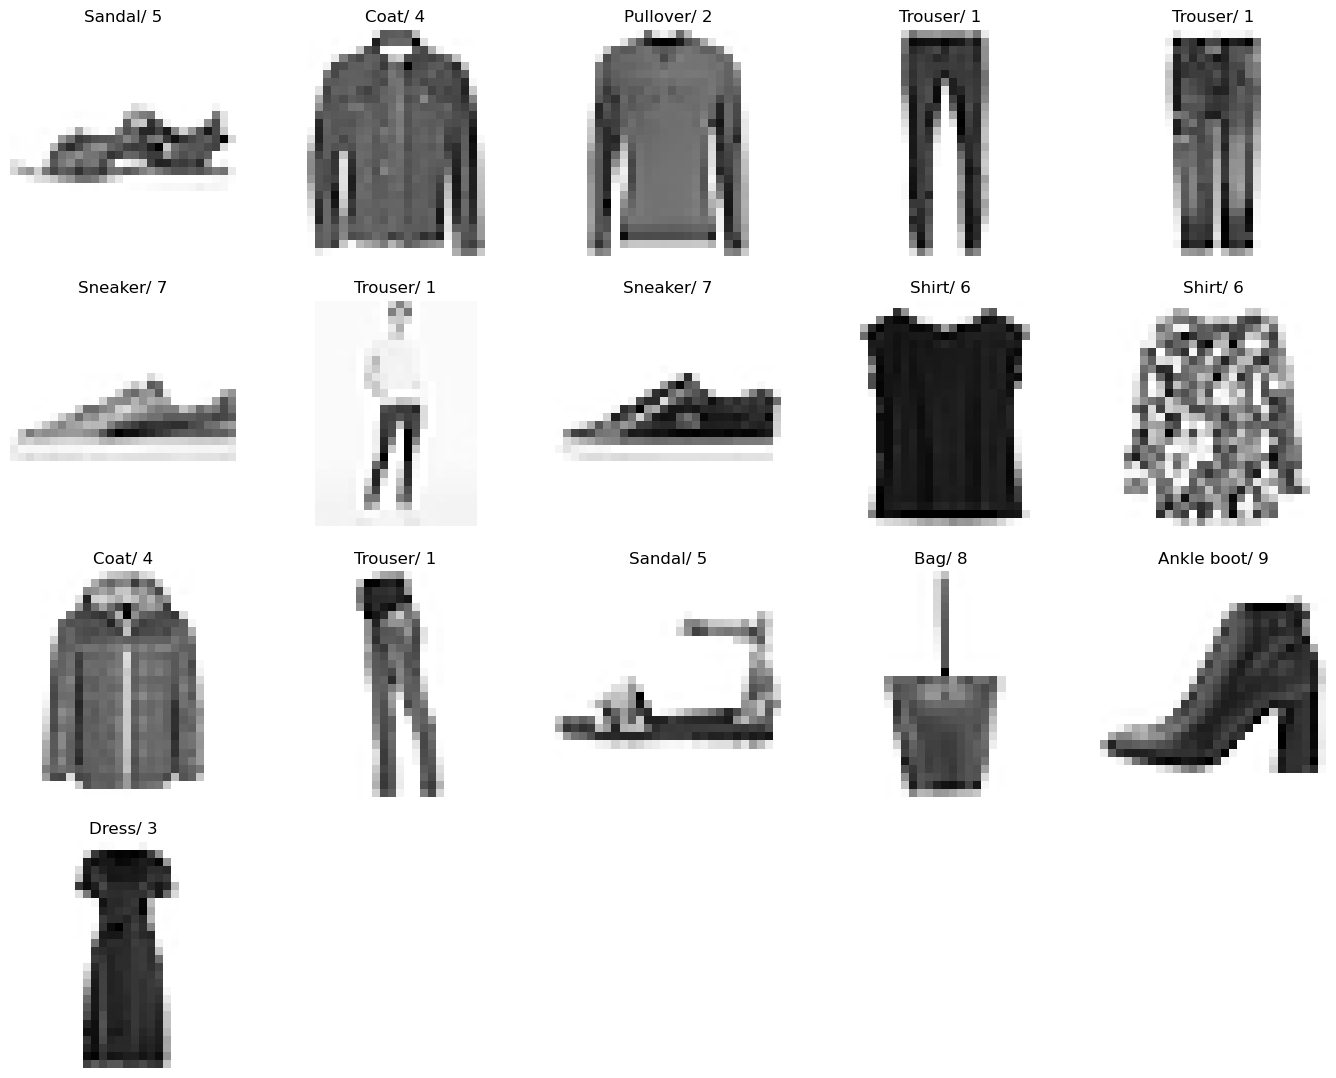

In [89]:
plt.figure(figsize =(17,17))

j=1
for i in np.random.randint(0,1000,16):
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(x_train[i], cmap= "Greys")
    plt.axis('off') #off the axis
    plt.title('{}/ {}'.format(classImage_label[y_train[i]], y_train[i]))

Changing the image dimension

In [94]:
x_train.shape

(60000, 28, 28, 1)

In [93]:
x_train.shape_train.ndim

AttributeError: 'numpy.ndarray' object has no attribute 'shape_train'

In [92]:
#Expecting conv2d_input to have 4 dimensions, but the array is with the shape of (28,28,1). Now, it will increase from 3 dimension to 4 dimension.
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [50]:
x_train.ndim

4

feature scaling

In [53]:
x_train = x_train/255
x_test = x_test/255

Spliting the dataset

In [55]:
from sklearn.model_selection 
import train_test_split 
x_train, x_validation, y_train, y_validation = train_test_split( test_size= 0.2, random_state=2020)

In [57]:
x_train.shape, y_train.shape, x_validation.shape, y_validation.shape

((38400, 28, 28, 1), (38400,), (9600, 28, 28, 1), (9600,))

Building a Convolutional Neural Network(CNNs)

In [60]:
# Building CNN model
cnn_model = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size = 3, strides = (1,1), padding = 'valid',activation = 'relu', input_shape = [28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same',activation= 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation= 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=256, activation= 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=128, activation= 'relu'),
    tf.keras.layers.Dense(units=10, activation= 'softmax'),
    ])

In [61]:
# compiling the model
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [63]:
# Training the model
cnn_model.fit(x_train, y_train, epochs = 20, batch_size = 16, verbose = 1, validation_data = (x_validation, y_validation))

Epoch 1/20
2400/2400 [==============================] - 19s 7ms/step - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.3030 - val_accuracy: 0.0953
Epoch 2/20
2400/2400 [==============================] - 18s 7ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3031 - val_accuracy: 0.0953
Epoch 3/20
2400/2400 [==============================] - 19s 8ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 4/20
2400/2400 [==============================] - 19s 8ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1007
Epoch 5/20
2400/2400 [==============================] - 19s 8ms/step - loss: 2.3028 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 6/20
2400/2400 [==============================] - 20s 8ms/step - loss: 2.3028 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 7/20
2400/2400 [==============================] - 20s 8ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3028 - val_ac

Testing the built model

In [64]:
y_pred = cnn_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [65]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302675485610962, 0.10000000149011612]

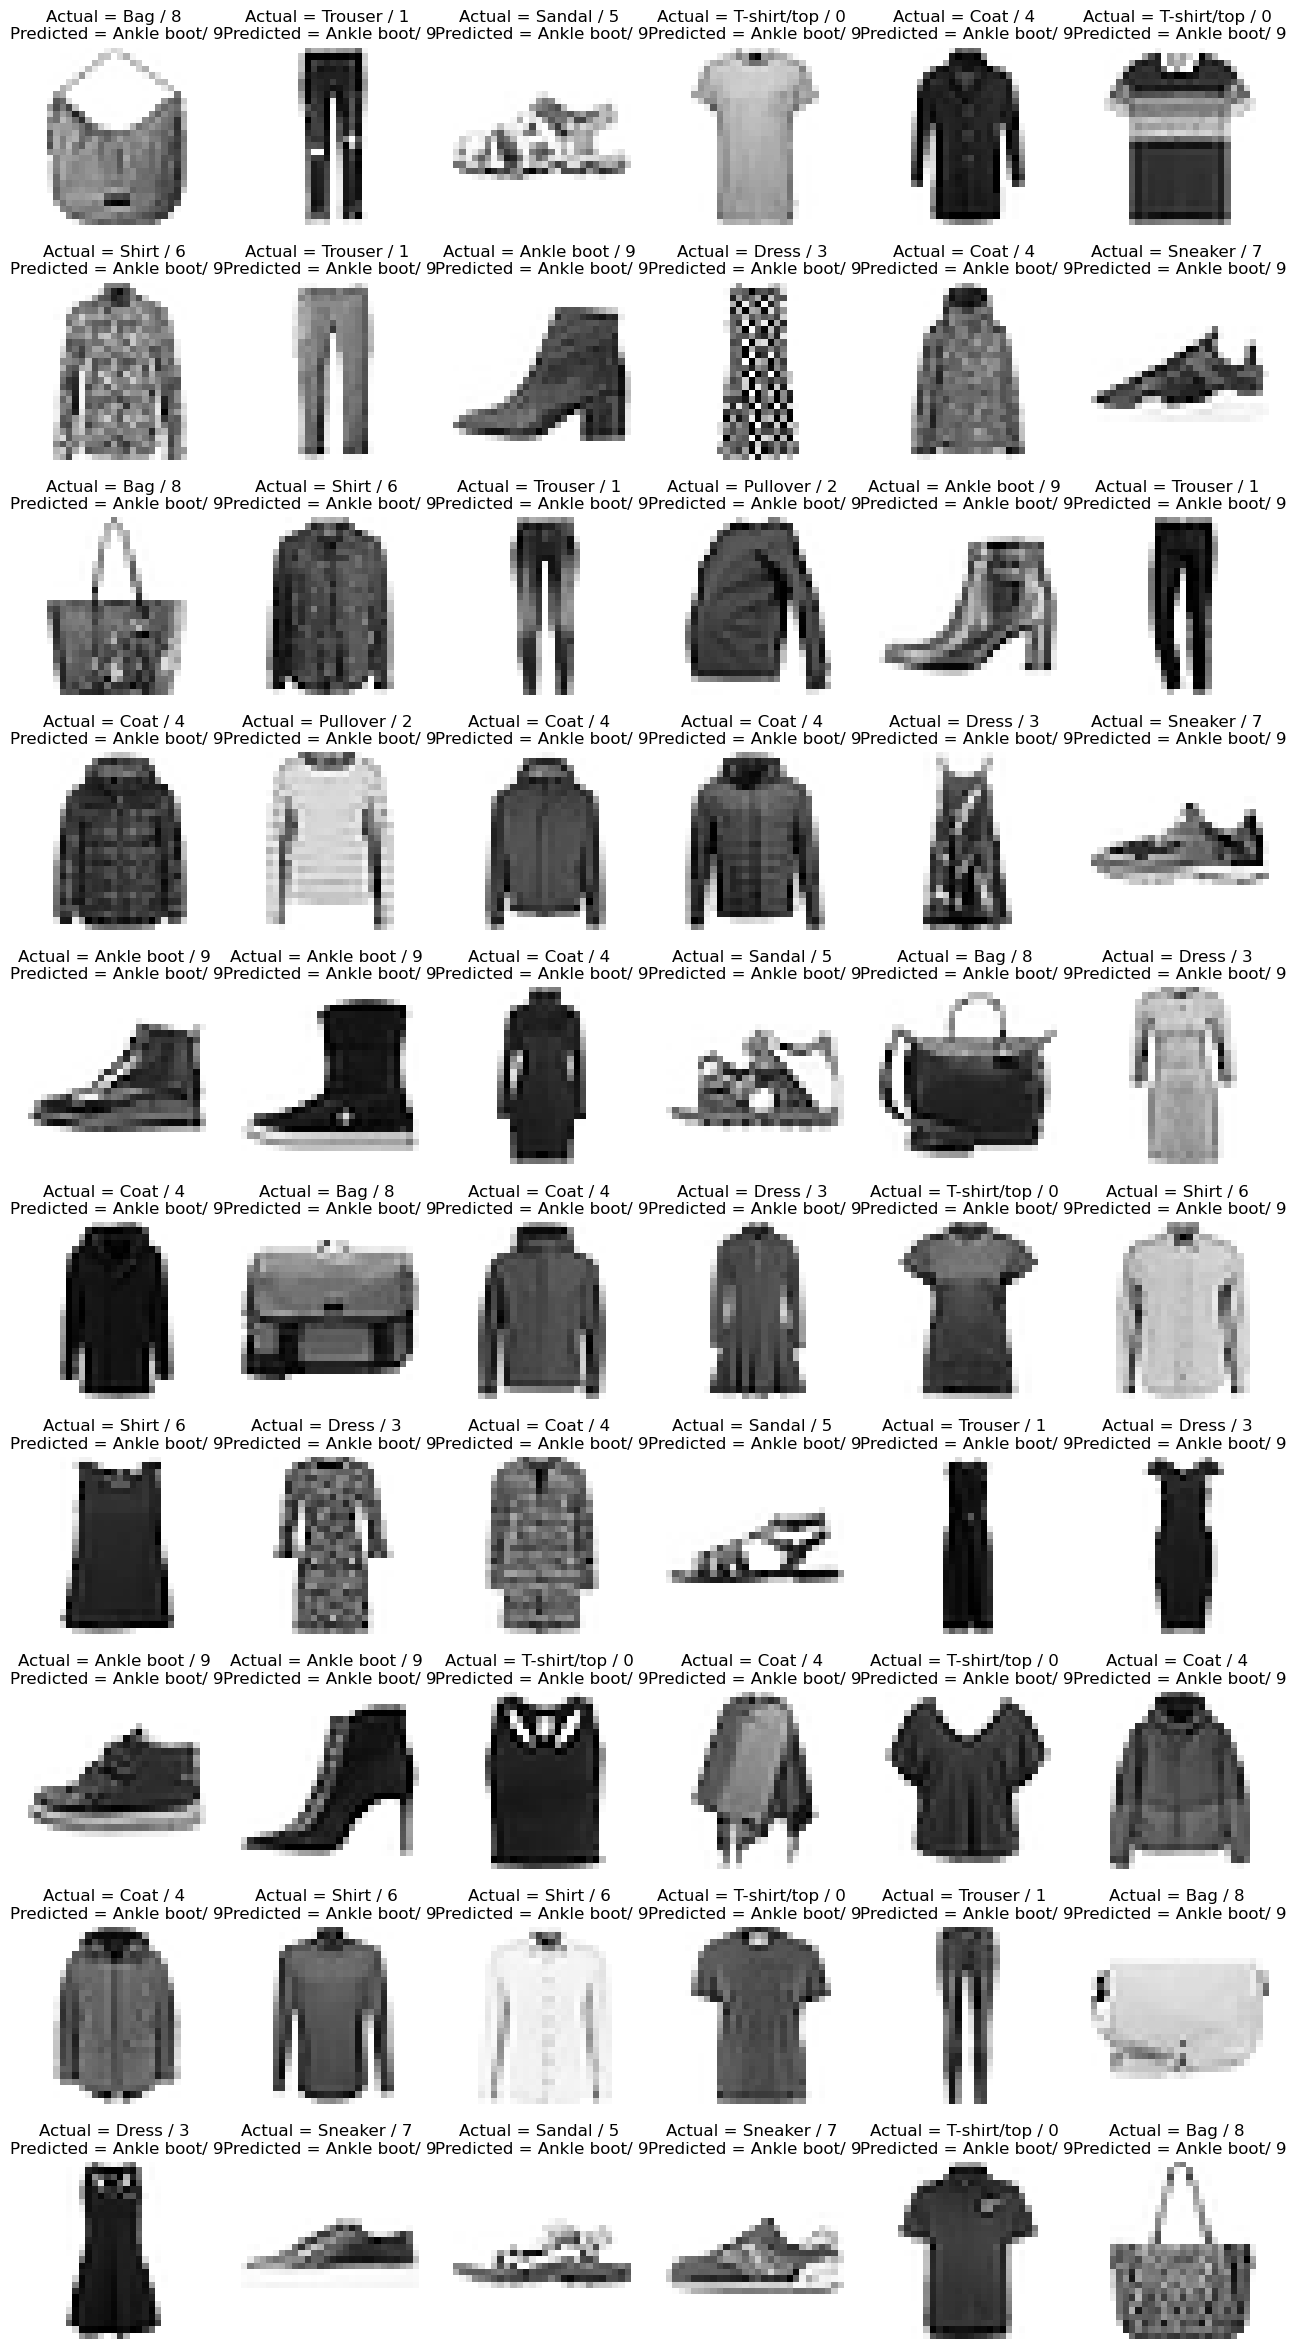

In [67]:
  #off the axis

Evaluating the model

<Axes: >

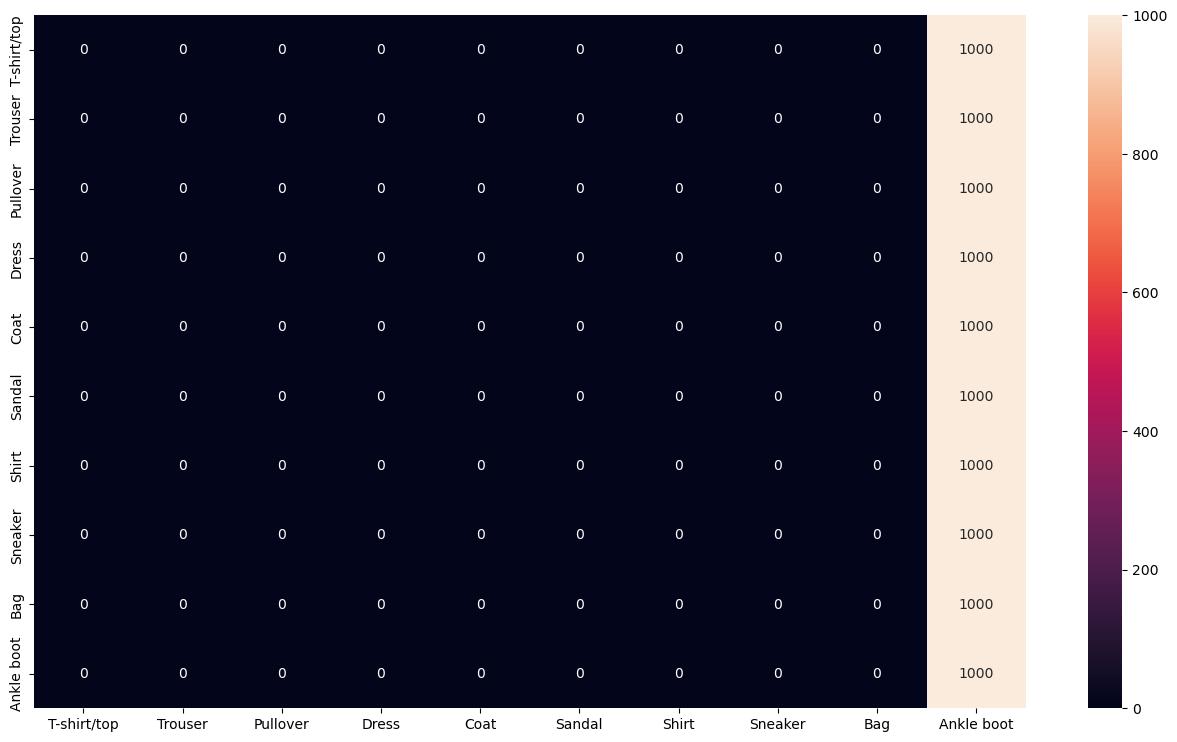

In [77]:
# Importing a library for confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

# Displaying the confusion Matrix
sns.heatmap(cm,annot = True, fmt = 'd', xticklabels = classImage_label, yticklabels = classImage_label)

In [1]:
# Creating confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot= True)

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)